<h2 style="color: #ff0a0aff">Trending YouTube Videos Analysis</h2> 


<img src="https://i.ytimg.com/vi/rC0o5qz0SJc/hqdefault.jpg" width="100%" height="500" />



### 📝 Project Description:
This project focuses on analyzing trending YouTube videos in the United States using the USvideos.csv dataset from Kaggle. The main goal is to uncover insights and patterns behind viral videos and understand what drives their popularity.

### 🔍 Objectives:
- Identify top-performing video categories
- Analyze how video titles and descriptions influence views
- Explore the relationship between views, likes, dislikes, and comments
- Detect the best publishing time for maximum reach
- Visualize trending keywords using WordCloud
- Sentiment analysis on video descriptions or comments


### 📊 Expected Outcomes:
- Understanding trends and content strategies
- Discovering influential channels
- Data-driven publishing time recommendations
- Actionable insights for content creators and marketers


### 👥 Target Audience:
- YouTube content creators
- Digital marketers
- Data analysts and enthusiasts

---


In [396]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to C:\Users\ALL IN
[nltk_data]     ONE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\ALL IN
[nltk_data]     ONE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [397]:
# Load Dataset
csv_path = os.path.join("..", "data", "USvideos.csv")
df = pd.read_csv(csv_path)


### Data Exploration

In [398]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [400]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [401]:
print(df.columns)

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')


### Data Cleaning

In [402]:
# Convert to datetime
# Fix trending_date format
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

# Convert publish_time to datetime
df['publish_time'] = pd.to_datetime(df['publish_time'])


In [403]:
# Split publish_time into separate date and time columns
df['publish_date'] = df['publish_time'].dt.date
df['publish_hour'] = df['publish_time'].dt.hour
df['publish_day'] = df['publish_time'].dt.day_name()

In [404]:
df["trending_date"].dt.year.astype(str).value_counts(normalize=True)

trending_date
2018    0.765562
2017    0.234438
Name: proportion, dtype: float64

The dataset consists of trending videos from 2017 and 2018, with approximately 73% of the data from 2018 and 27% from 2017.

---

In [405]:
# Check updated data types
print(df.dtypes)

video_id                               object
trending_date                  datetime64[ns]
title                                  object
channel_title                          object
category_id                             int64
publish_time              datetime64[ns, UTC]
tags                                   object
views                                   int64
likes                                   int64
dislikes                                int64
comment_count                           int64
thumbnail_link                         object
comments_disabled                        bool
ratings_disabled                         bool
video_error_or_removed                   bool
description                            object
publish_date                           object
publish_hour                            int32
publish_day                            object
dtype: object


In [406]:
# Drop unnecessary columns
columns_to_drop = ['thumbnail_link', 'video_error_or_removed'] 
df.drop(columns=columns_to_drop, axis=1, inplace=True)


These columns do not add analytical value and are removed to reduce noise.

---

In [407]:
# Remove duplicates
df.duplicated().sum()

np.int64(48)

In [408]:
df.drop_duplicates(inplace=True)

In [409]:
df.isnull().sum()

video_id               0
trending_date          0
title                  0
channel_title          0
category_id            0
publish_time           0
tags                   0
views                  0
likes                  0
dislikes               0
comment_count          0
comments_disabled      0
ratings_disabled       0
description          569
publish_date           0
publish_hour           0
publish_day            0
dtype: int64

In [410]:
# Fill missing description
df['description'].fillna("No description", inplace=True)

### JSON Mapping

In [411]:
# Load category JSON
with open(r"G:\NTI\project2\data\US_category_id.json", "r") as f:
    category_data = json.load(f)

# Create mapping dict
category_mapping = {}
for item in category_data['items']:
    category_id = int(item['id'])
    category_name = item['snippet']['title']
    category_mapping[category_id] = category_name

# Map category_name into the dataframe
df['category_name'] = df['category_id'].map(category_mapping)



Entertainment and Music are the most common categories, which aligns with typical YouTube trends.

These two categories should be analyzed in more depth due to their volume and potential engagement.

---

### Feature Engineering

Create New Features

In [412]:
# Avoid division by zero using np.where

# Create like_ratio (likes / views), safely avoiding division by zero
df['like_ratio'] = np.where(df['views'] > 0, df['likes'] / df['views'], 0)

# Create comment_ratio (comments / views), safely
df['comment_ratio'] = np.where(df['views'] > 0, df['comment_count'] / df['views'], 0)


In [413]:
df['title_length'] = df['title'].apply(lambda x: len(str(x).split()))
df['num_tags'] = df['tags'].apply(lambda x: 0 if x == '[none]' else len(str(x).split('|')))

In [414]:
df['publish_time'] = pd.to_datetime(df['publish_time'])

# Extract new time-based features
df['publish_hour'] = df['publish_time'].dt.hour
df['publish_day'] = df['publish_time'].dt.day_name()
df['publish_month'] = df['publish_time'].dt.month_name()


In [415]:
# Create engagement_score = (likes + comments) / views
df['engagement_score'] = np.where(df['views'] > 0, 
                                  (df['likes'] + df['comment_count']) / df['views'], 0)


- like_ratio and comment_ratio were created to measure engagement relative to views.
- title_length calculates the number of words in a video’s title – useful for analyzing how title length affects views.
- num_tags captures the number of tags – tags might influence discoverability.
- publish_hour / publish_day / publish_month extracted for analyzing upload timing impact.
- engagement_score provides a unified engagement metric = (likes + comments) ÷ views.

---

### Text Preprocessing

In [416]:
# 1. Remove rows with missing titles
df = df.dropna(subset=['title'])

# 2. Convert titles to lowercase
df['clean_title'] = df['title'].str.lower()

# 3. Remove punctuation from titles
df['clean_title'] = df['clean_title'].str.translate(str.maketrans('', '', string.punctuation))

# 4. Remove numbers
df['clean_title'] = df['clean_title'].str.replace(r'\d+', '', regex=True)

# 5. Remove stopwords
stop_words = set(stopwords.words('english'))
df['clean_title'] = df['clean_title'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# 6. Lemmatize the words
lemmatizer = WordNetLemmatizer()
df['clean_title'] = df['clean_title'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

# 7. Create feature: title_length (number of words in cleaned title)
df['title_length'] = df['clean_title'].apply(lambda x: len(x.split()))

# Check a sample
print(df[['title', 'clean_title', 'title_length']].head())


                                               title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE   
1  The Trump Presidency: Last Week Tonight with J...   
2  Racist Superman | Rudy Mancuso, King Bach & Le...   
3                   Nickelback Lyrics: Real or Fake?   
4                           I Dare You: GOING BALD!?   

                                         clean_title  title_length  
0                                 want talk marriage             3  
1  trump presidency last week tonight john oliver...             8  
2   racist superman rudy mancuso king bach lele pons             8  
3                         nickelback lyric real fake             4  
4                                    dare going bald             3  


Removed missing titles to ensure clean input.

Converted titles to lowercase to normalize text.

Removed punctuation and numbers to reduce noise.

Applied stopwords removal and lemmatization to simplify and unify words.

Created a new feature title_length that captures the number of meaningful words in each title after cleaning.

---


Sentiment Analysis

In [417]:
# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

df['title_sentiment'] = df['title'].apply(get_sentiment)


In [418]:
# Label sentiment based on polarity
def label_sentiment(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['title_sentiment'].apply(label_sentiment)


### Preparing for Power BI

In [419]:
# Select important columns to export
columns_to_export = [
    'video_id', 'title', 'channel_title', 'category_name',
    'publish_time', 'publish_hour', 'publish_day',
    'views', 'likes', 'dislikes', 'comment_count',
    'like_ratio', 'comment_ratio', 'engagement_score',
    'title_length', 'num_tags', 'title_sentiment', 'sentiment_label',
]

# Export to CSV
df[columns_to_export].to_csv(r'G:\NTI\project2\data\clean_data_for_powerbi.csv', index=False)

print("Data exported to youtube_processed.csv for powerbi")


Data exported to youtube_processed.csv for powerbi



Cleaned dataset with engineered and sentiment columns exported.
 Ready for dashboarding via Power BI.

---

### Exploratory Data Analysis (EDA)

Univariate Analysis

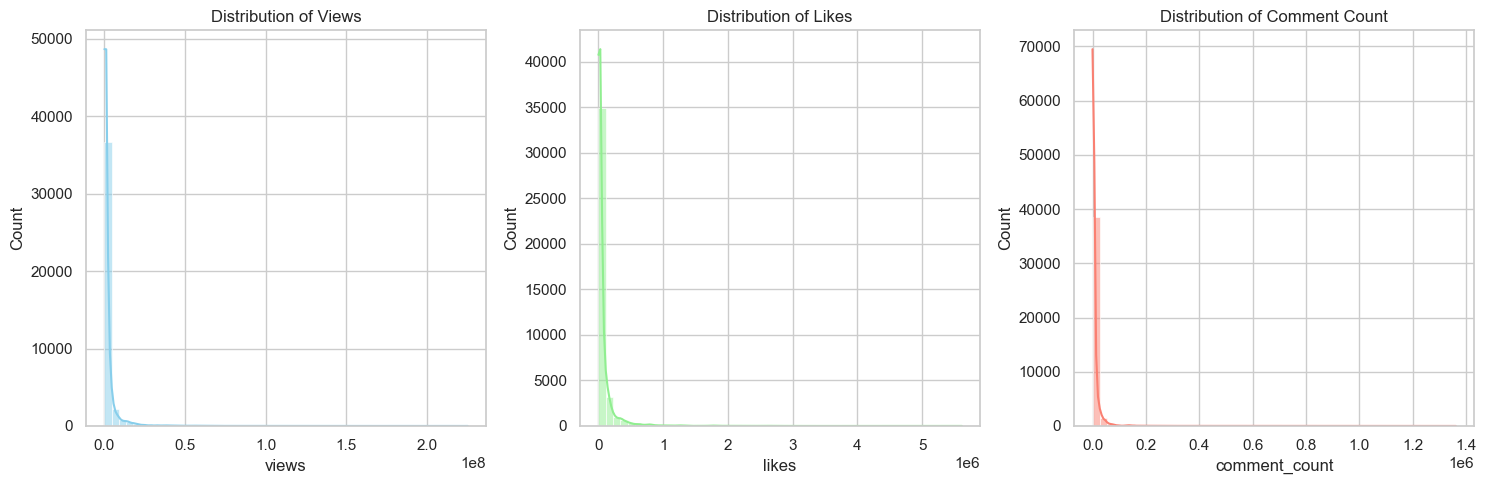

In [420]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))

# Views Distribution
plt.subplot(1, 3, 1)
sns.histplot(df['views'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Views')

# Likes Distribution
plt.subplot(1, 3, 2)
sns.histplot(df['likes'], bins=50, kde=True, color='lightgreen')
plt.title('Distribution of Likes')

# Comment Count Distribution
plt.subplot(1, 3, 3)
sns.histplot(df['comment_count'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Comment Count')

plt.tight_layout()
plt.show()


Bivariate Analysis 

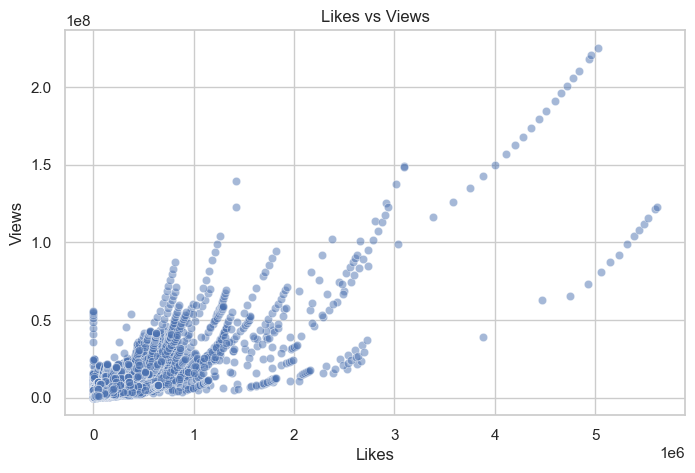

In [421]:
# Likes vs Views
plt.figure(figsize=(8, 5))
sns.scatterplot(x='likes', y='views', data=df, alpha=0.5)
plt.title('Likes vs Views')
plt.xlabel('Likes')
plt.ylabel('Views')
plt.show()


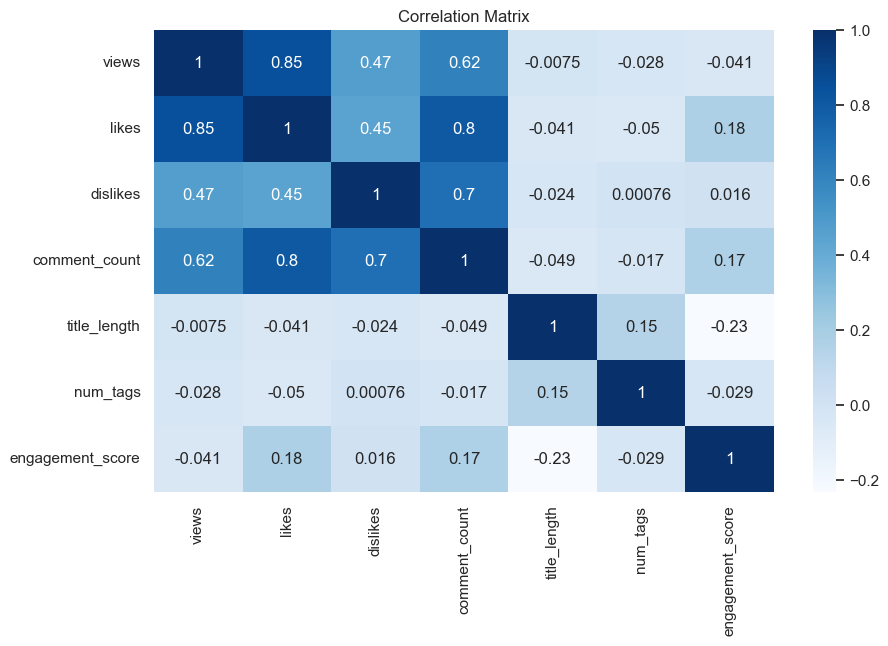

In [422]:
# Correlation Heatmap
numeric_cols = ['views', 'likes', 'dislikes', 'comment_count', 'title_length', 'num_tags', 'engagement_score']
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

### Multivariate Analysis

Correlation of Engagement Features

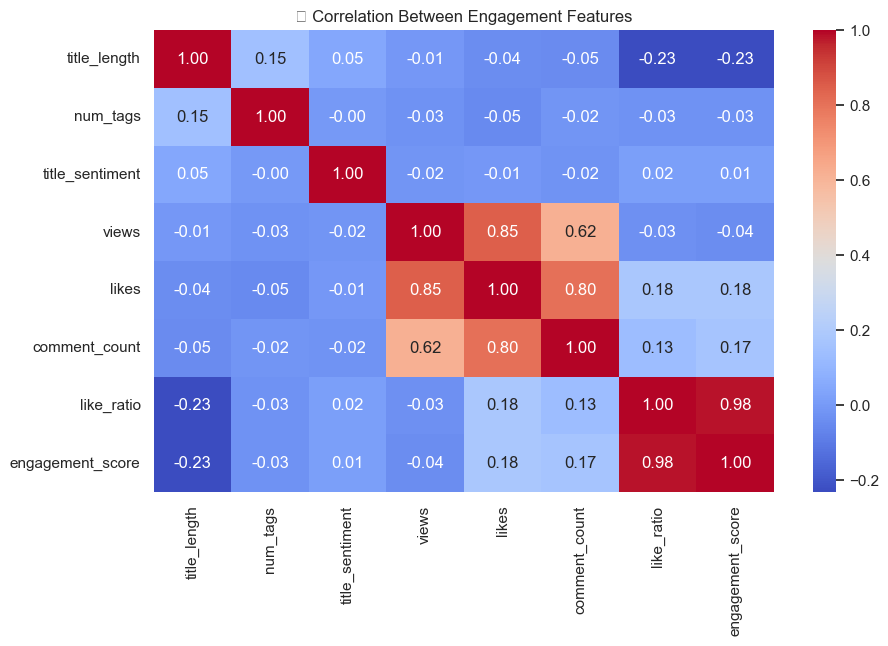

In [423]:
# Select key features that might influence user engagement
engagement_features = [
    'title_length', 'num_tags', 'title_sentiment', 'views',
    'likes', 'comment_count', 'like_ratio', 'engagement_score'
]

# Compute correlation matrix
corr_matrix = df[engagement_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔍 Correlation Between Engagement Features")
plt.show()


Views show strong positive correlation with likes and comment_count.

Engagement_score is positively correlated with like_ratio and comment_ratio.

Title sentiment and title_length have weaker but notable relationships with views and engagement.

Useful for selecting features in any modeling or prioritizing content strategy metrics.

---

Title Length vs Tags vs Views

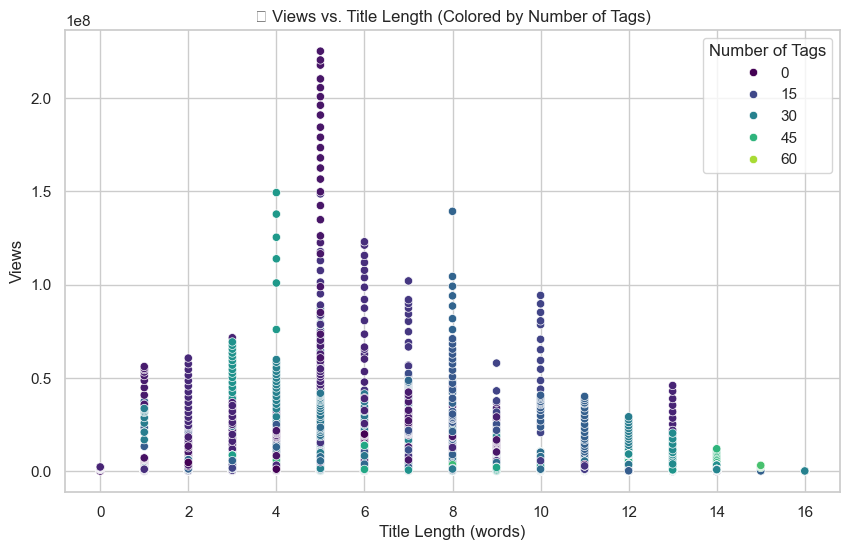

In [424]:
# Create a scatter plot to visualize multivariate relationships
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='title_length', y='views', hue='num_tags', palette='viridis')
plt.title("📊 Views vs. Title Length (Colored by Number of Tags)")
plt.xlabel("Title Length (words)")
plt.ylabel("Views")
plt.legend(title='Number of Tags')
plt.show()


Correlation Analysis

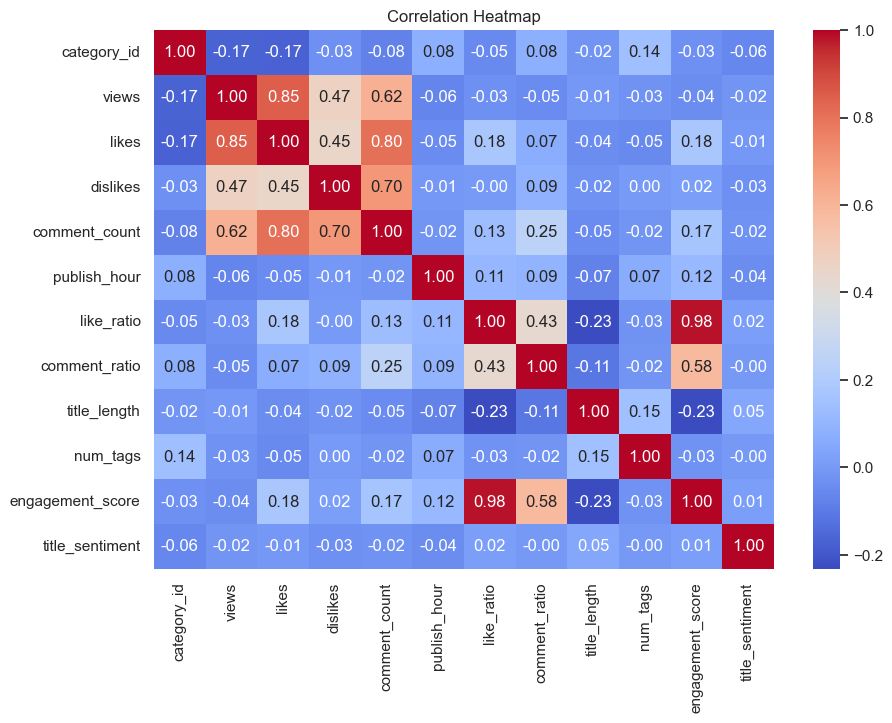

In [425]:
# Selecting only numeric columns
numeric_cols = df.select_dtypes(include=np.number)

# Plot correlation heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Sentiment Analysis Visuals

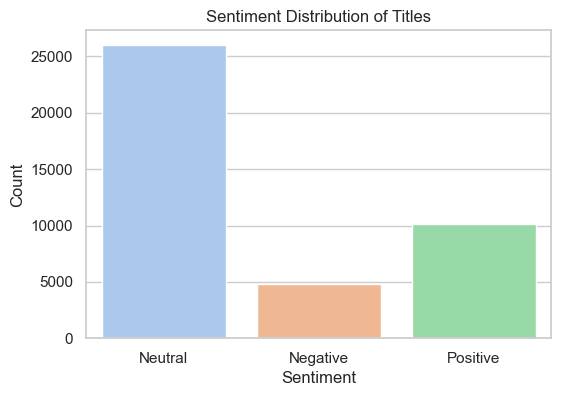

In [426]:
# Count of sentiment labels
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment_label', palette='pastel')
plt.title('Sentiment Distribution of Titles')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Most titles are neutral in sentiment, with a fair number of positive ones.
Very few negative titles, which may imply creators avoid negative tones in viral content.
Sentiment can be used later for content tone vs. views analysis.

---

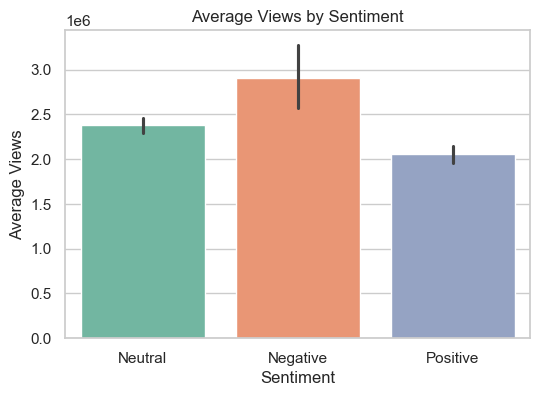

In [427]:
# Impact of sentiment on average views
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='sentiment_label', y='views', palette='Set2')
plt.title('Average Views by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Views')
plt.show()

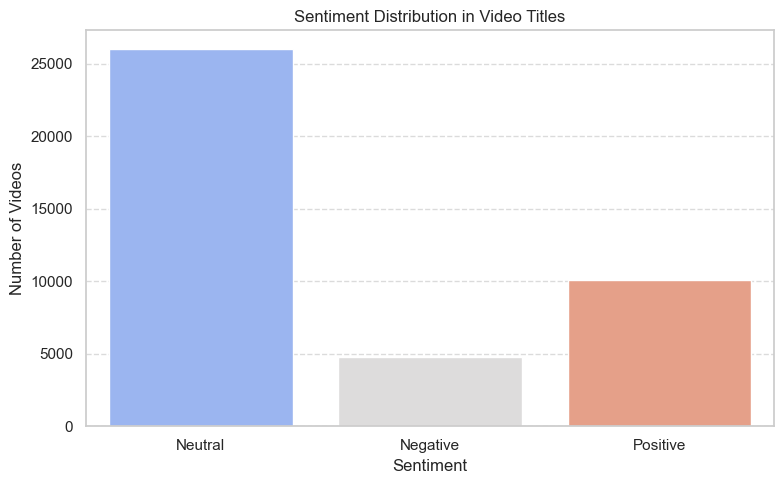

In [428]:
plt.figure(figsize=(8,5))
sns.countplot(x='sentiment_label', data=df, palette='coolwarm')
plt.title('Sentiment Distribution in Video Titles')
plt.xlabel('Sentiment')
plt.ylabel('Number of Videos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


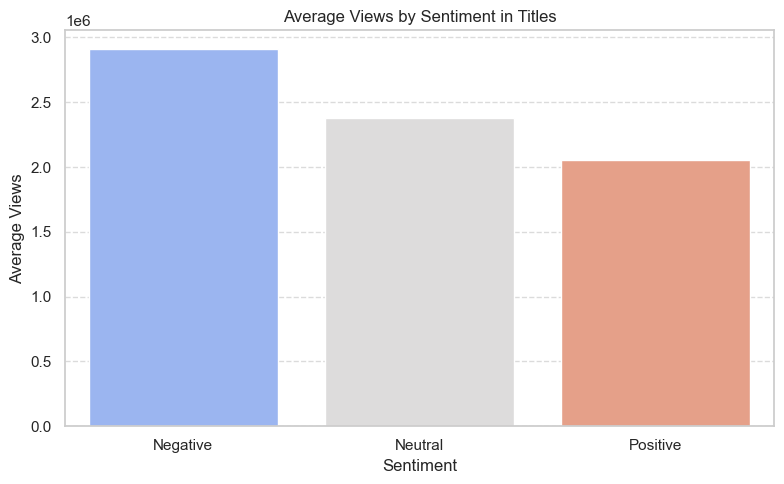

In [429]:
# Average views by sentiment
sentiment_views = df.groupby('sentiment_label')['views'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='sentiment_label', y='views', data=sentiment_views, palette='coolwarm')
plt.title('Average Views by Sentiment in Titles')
plt.xlabel('Sentiment')
plt.ylabel('Average Views')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


WordCloud for Video Titles

In [430]:
# Combine all titles into one string
title_text = ' '.join(df['title'].astype(str).tolist())

# Define stopwords (common words to ignore)
stopwords = set(STOPWORDS)

# Generate WordCloud
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    stopwords=stopwords,
    colormap='Blues',
    max_words=200
).generate(title_text)


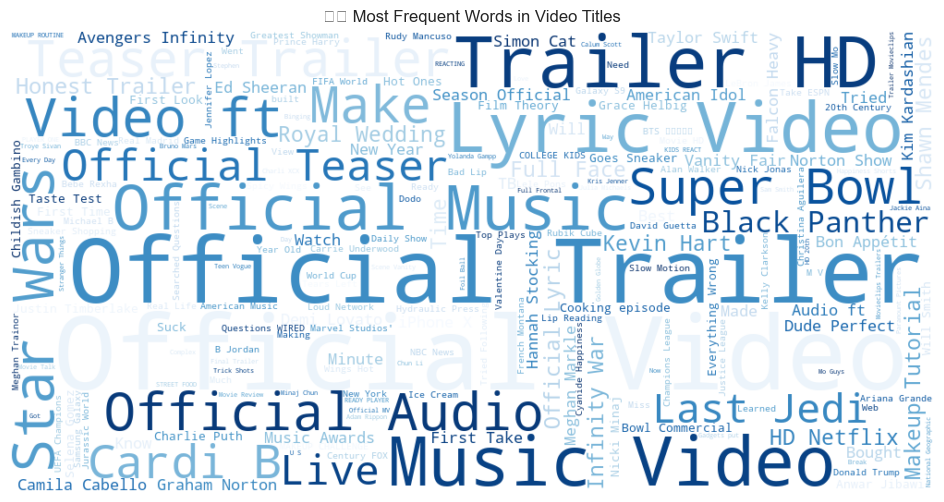

In [431]:
# Display WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("☁️ Most Frequent Words in Video Titles")
plt.show()

Frequently appearing words include: "official", "music", "trailer", etc.
Indicates what keywords drive trending potential.
Can guide title optimization strategies.

---

Sentiment Analysis with TextBlob

In [432]:
# Apply TextBlob on each title
df['title_sentiment'] = df['title'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)

# Convert sentiment to label
def label_sentiment(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_label'] = df['title_sentiment'].apply(label_sentiment)

# Optional: encode label
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
df['sentiment_label_encoded'] = df['sentiment_label'].map(sentiment_map)

print("✅ Sentiment analysis completed using TextBlob.")


✅ Sentiment analysis completed using TextBlob.


Category Analysis

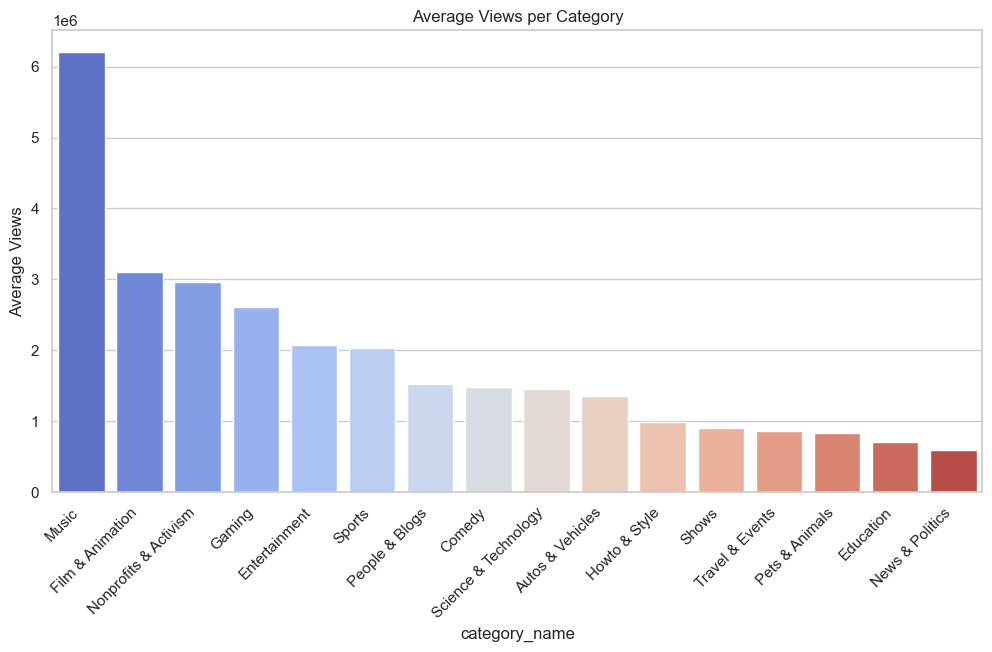

In [433]:
# Average Views per Category
plt.figure(figsize=(12, 6))
category_views = df.groupby('category_name')['views'].mean().sort_values(ascending=False)
sns.barplot(x=category_views.index, y=category_views.values, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Average Views per Category')
plt.ylabel('Average Views')
plt.show()


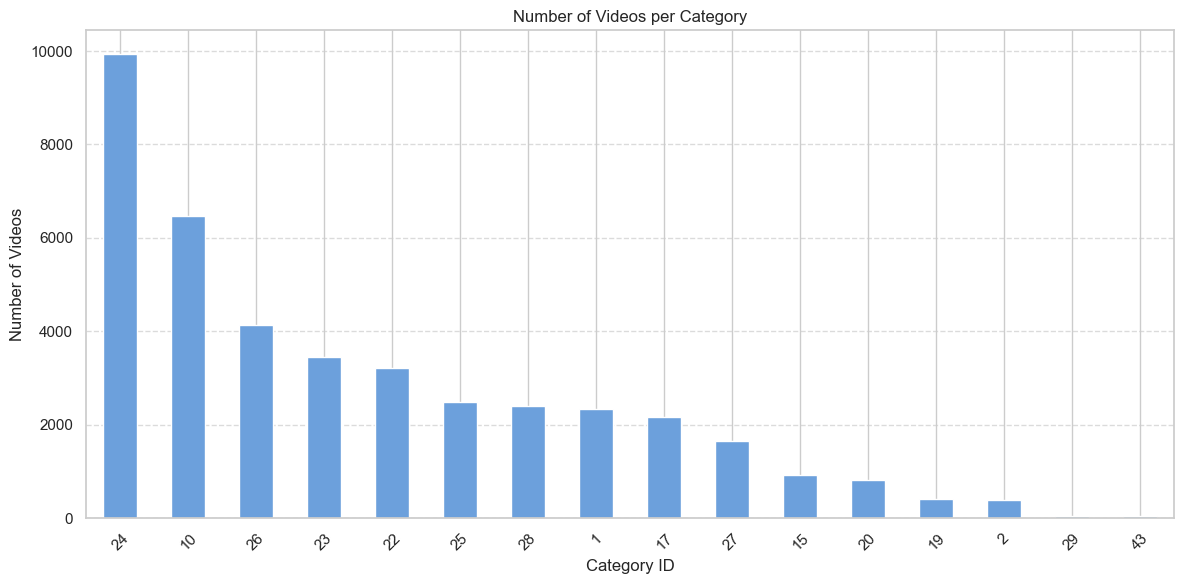

In [434]:
# Count of videos per category
plt.figure(figsize=(12,6))
df['category_id'].value_counts().plot(kind='bar', color='#6CA0DC')
plt.title('Number of Videos per Category')
plt.xlabel('Category ID')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


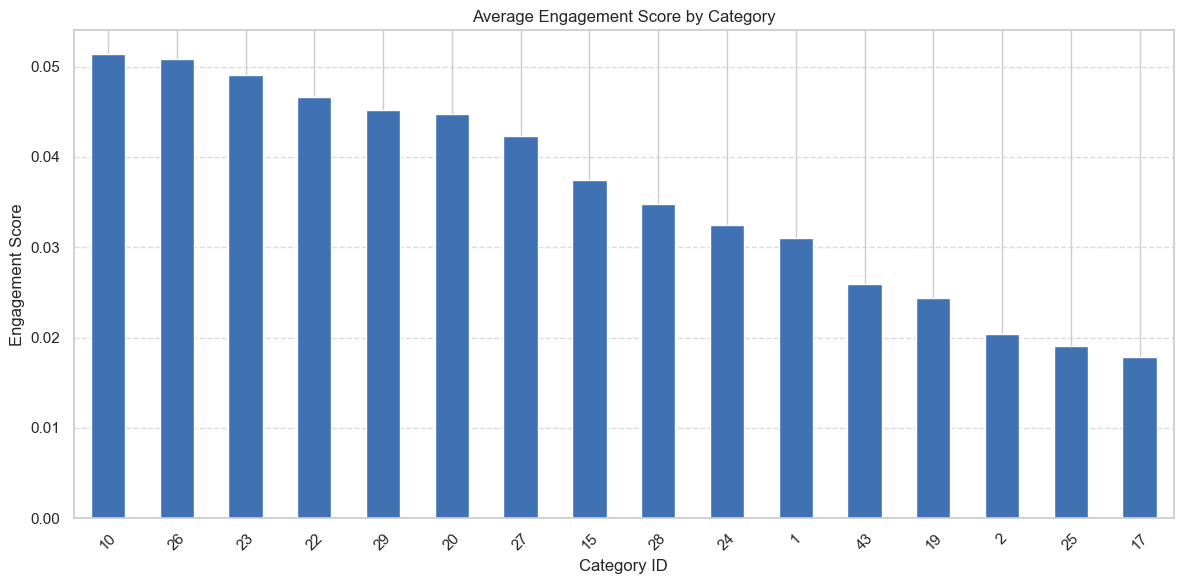

In [435]:
# Average engagement score per category
plt.figure(figsize=(12,6))
df.groupby('category_id')['engagement_score'].mean().sort_values(ascending=False).plot(kind='bar', color='#4072B3')
plt.title('Average Engagement Score by Category')
plt.xlabel('Category ID')
plt.ylabel('Engagement Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


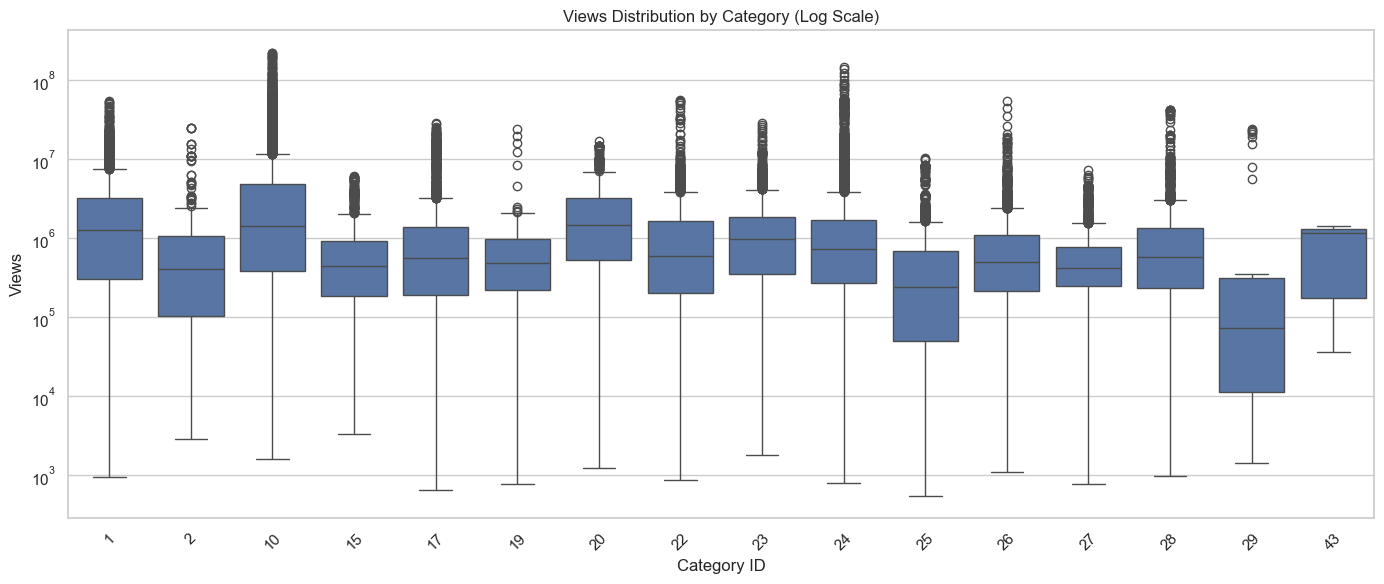

In [436]:
# Boxplot: Views per Category
plt.figure(figsize=(14,6))
sns.boxplot(x='category_id', y='views', data=df)
plt.yscale('log')
plt.title('Views Distribution by Category (Log Scale)')
plt.xlabel('Category ID')
plt.ylabel('Views')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Channel Analysis

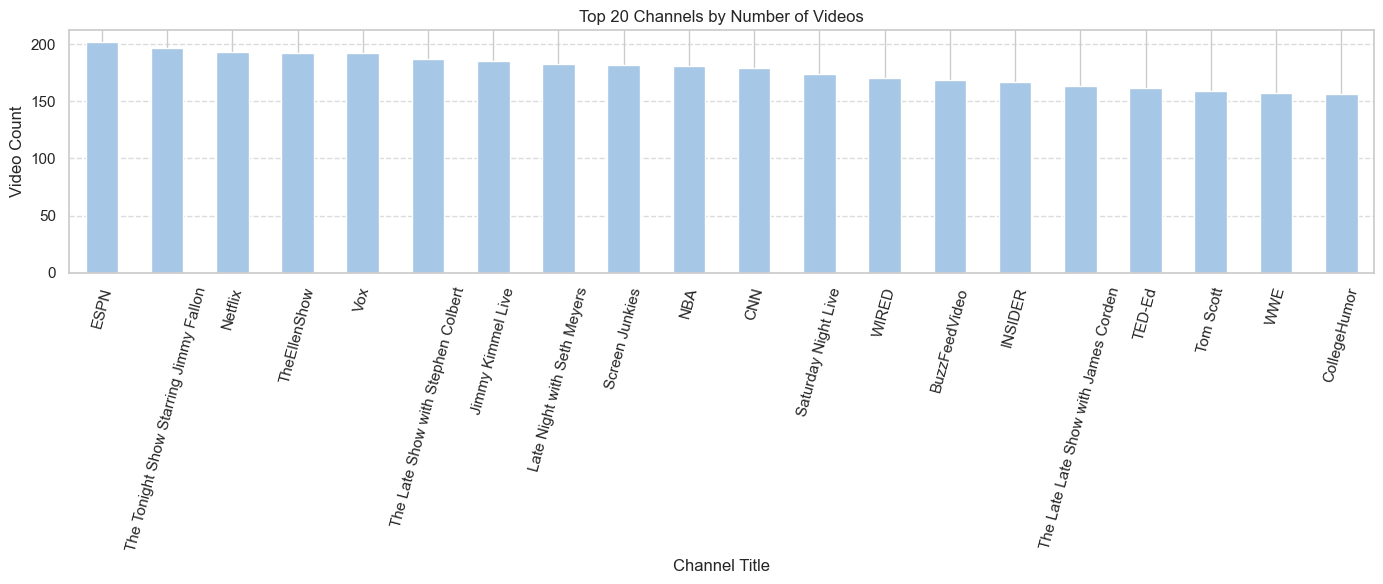

In [437]:
# Top 20 channels by number of videos
plt.figure(figsize=(14,6))
df['channel_title'].value_counts().head(20).plot(kind='bar', color='#A7C7E7')
plt.title('Top 20 Channels by Number of Videos')
plt.xlabel('Channel Title')
plt.ylabel('Video Count')
plt.xticks(rotation=75)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


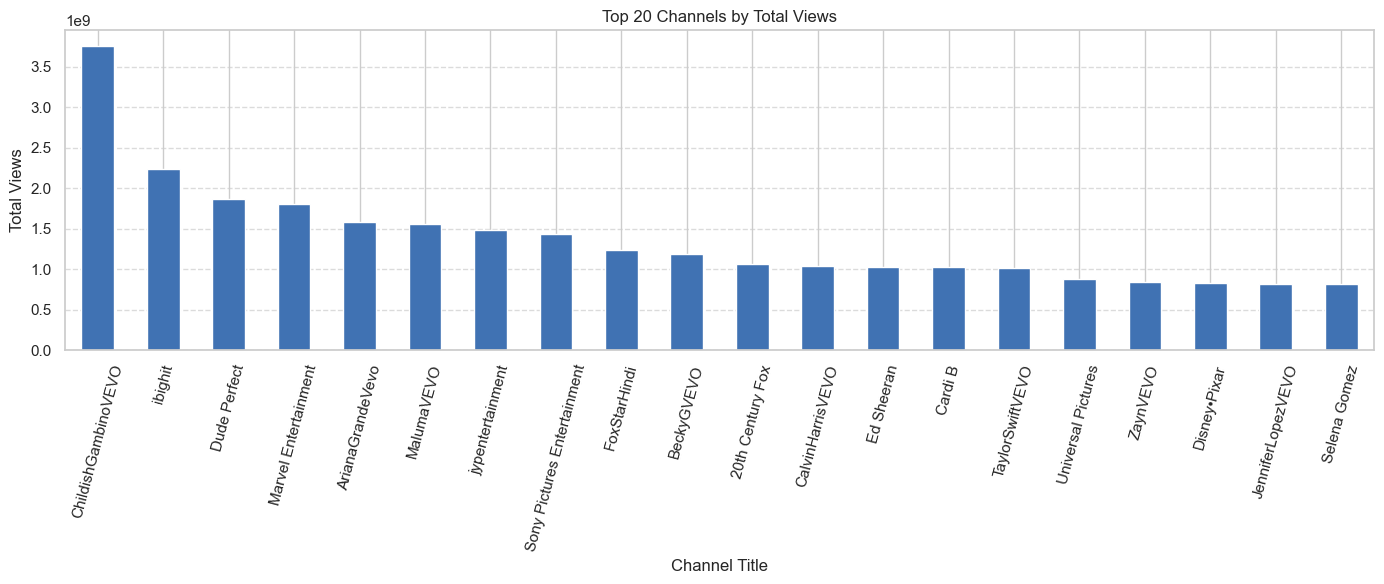

In [438]:
# Top 20 channels by total views
top_views = df.groupby('channel_title')['views'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(14,6))
top_views.plot(kind='bar', color='#4072B3')
plt.title('Top 20 Channels by Total Views')
plt.xlabel('Channel Title')
plt.ylabel('Total Views')
plt.xticks(rotation=75)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


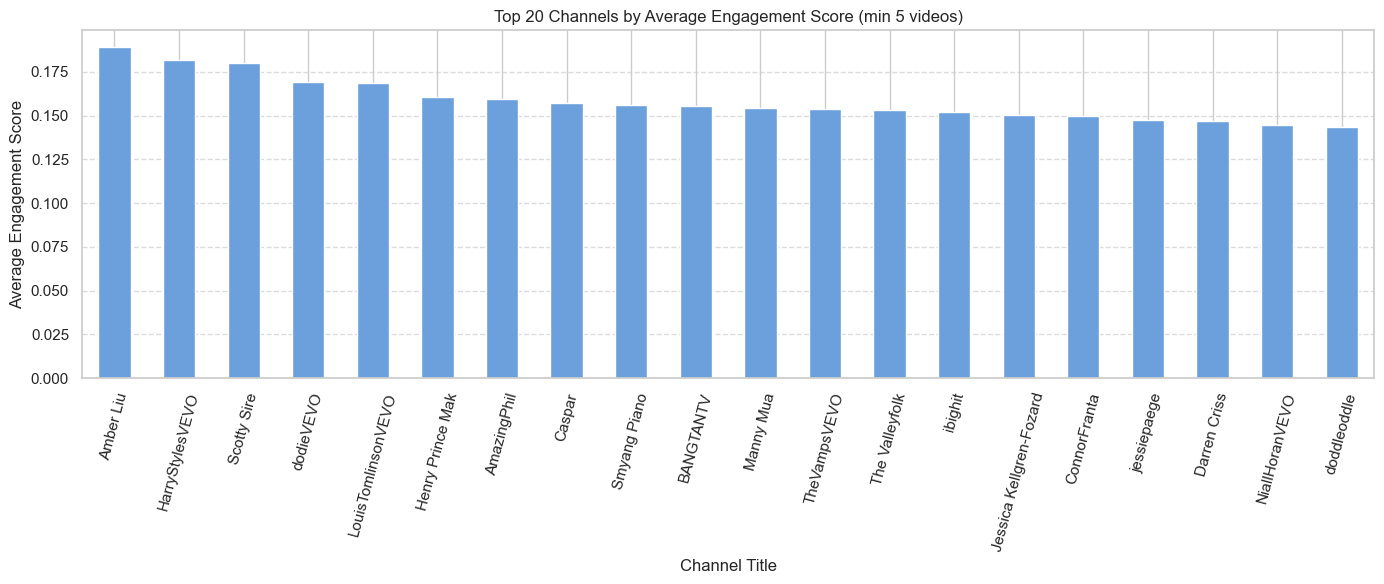

In [439]:
# Top 20 channels by average engagement score (with more than 5 videos)
channel_engagement = df.groupby('channel_title').agg({
    'engagement_score': 'mean',
    'video_id': 'count'
})

channel_engagement = channel_engagement[channel_engagement['video_id'] >= 5]
top_engagement = channel_engagement.sort_values('engagement_score', ascending=False).head(20)

plt.figure(figsize=(14,6))
top_engagement['engagement_score'].plot(kind='bar', color='#6CA0DC')
plt.title('Top 20 Channels by Average Engagement Score (min 5 videos)')
plt.xlabel('Channel Title')
plt.ylabel('Average Engagement Score')
plt.xticks(rotation=75)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Some channels post many videos but don’t receive as many total views, while others post fewer but get much more engagement. This highlights that quantity doesn’t always equal reach.


---

### Top Trending Videos



In [440]:
# Show top 10 most viewed videos
top_videos = df.sort_values(by='views', ascending=False).head(10)[
    ['title', 'channel_title', 'category_name', 'views']
]
print(top_videos)


                                                   title        channel_title  \
38547  Childish Gambino - This Is America (Official V...  ChildishGambinoVEVO   
38345  Childish Gambino - This Is America (Official V...  ChildishGambinoVEVO   
38146  Childish Gambino - This Is America (Official V...  ChildishGambinoVEVO   
37935  Childish Gambino - This Is America (Official V...  ChildishGambinoVEVO   
37730  Childish Gambino - This Is America (Official V...  ChildishGambinoVEVO   
37531  Childish Gambino - This Is America (Official V...  ChildishGambinoVEVO   
37333  Childish Gambino - This Is America (Official V...  ChildishGambinoVEVO   
37123  Childish Gambino - This Is America (Official V...  ChildishGambinoVEVO   
36913  Childish Gambino - This Is America (Official V...  ChildishGambinoVEVO   
36710  Childish Gambino - This Is America (Official V...  ChildishGambinoVEVO   

      category_name      views  
38547         Music  225211923  
38345         Music  220490543  
38146    

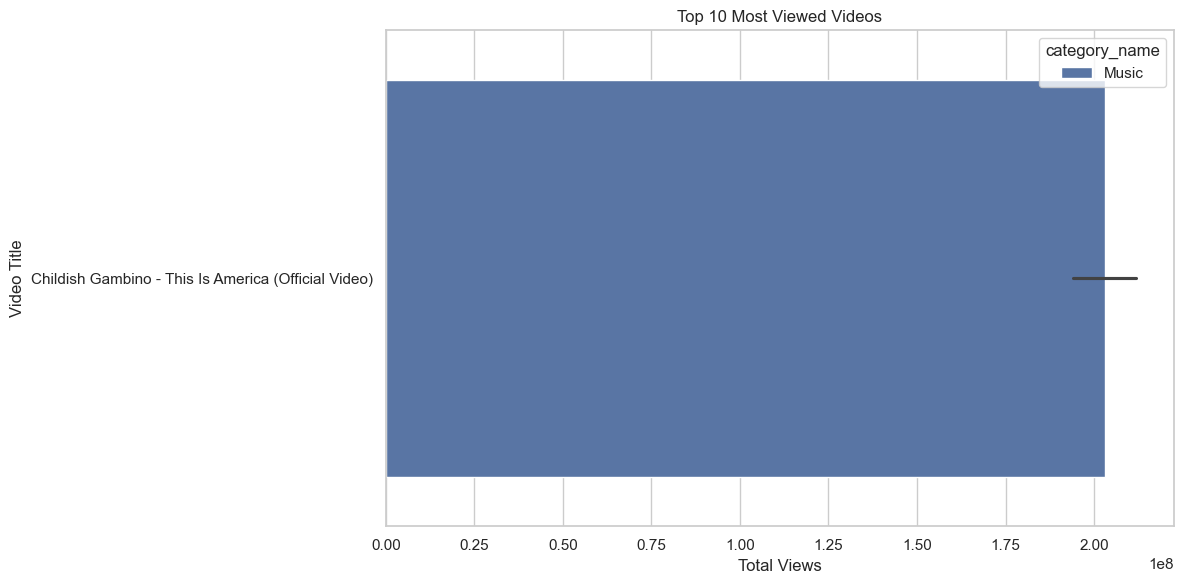

In [441]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_videos, y='title', x='views', hue='category_name', dodge=False)
plt.title('Top 10 Most Viewed Videos')
plt.xlabel('Total Views')
plt.ylabel('Video Title')
plt.tight_layout()
plt.show()



All top 10 most viewed videos are from the same video by 'ChildishGambinoVEVO', repeated across different dates.
This emphasizes the viral nature of the video "This Is America".
Most likely, the video belongs to the Music category, showing how music content can dominate trends when it goes viral.

---

Publishing Time Analysis

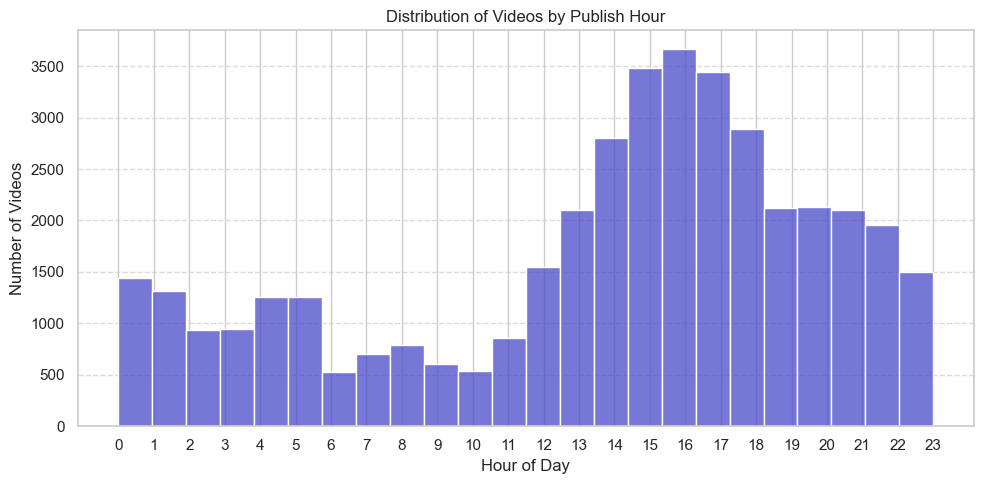

In [442]:
# Histogram of publish hours
plt.figure(figsize=(10,5))
sns.histplot(df['publish_hour'], bins=24, kde=False, color="#4949C8")
plt.title('Distribution of Videos by Publish Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Videos')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


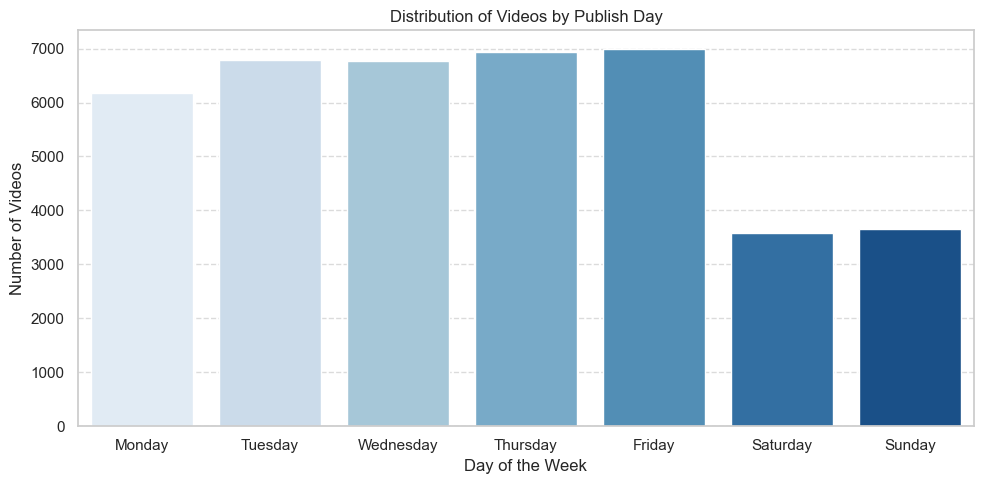

In [443]:
# Bar plot of publish day
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10,5))
sns.countplot(x='publish_day', data=df, order=day_order, palette='Blues')
plt.title('Distribution of Videos by Publish Day')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Videos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


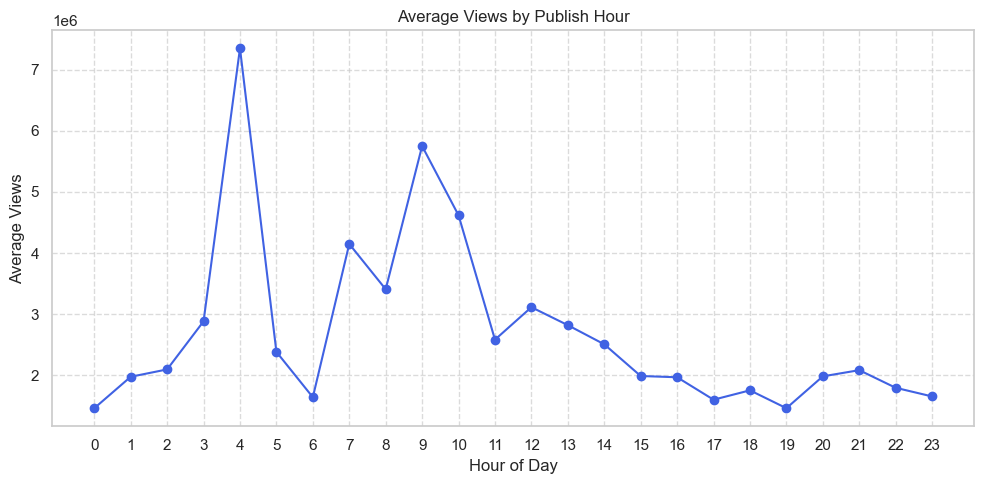

In [444]:
# Average views per publish hour
hourly_views = df.groupby('publish_hour')['views'].mean()

plt.figure(figsize=(10,5))
hourly_views.plot(kind='line', marker='o', color='#4062E3')
plt.title('Average Views by Publish Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Views')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Videos published between 3 PM to 8 PM receive higher average views, indicating it's a strategic time for gaining traction.

---

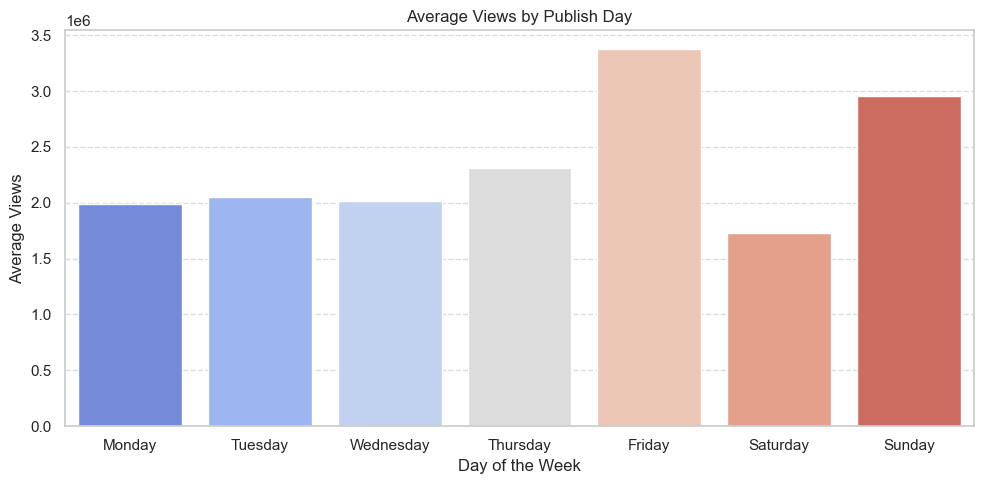

In [445]:
# Bar plot of publish day
avg_views_per_day = df.groupby('publish_day')['views'].mean().reindex(day_order)

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_views_per_day.index, y=avg_views_per_day.values, palette='coolwarm')
plt.title('Average Views by Publish Day')
plt.xlabel('Day of the Week')
plt.ylabel('Average Views')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Fridays and Sundays appear to be the most effective days for publishing videos — combining either high traffic (Friday) or low competition with strong engagement (Sunday).

---


Title & Tags Analysis

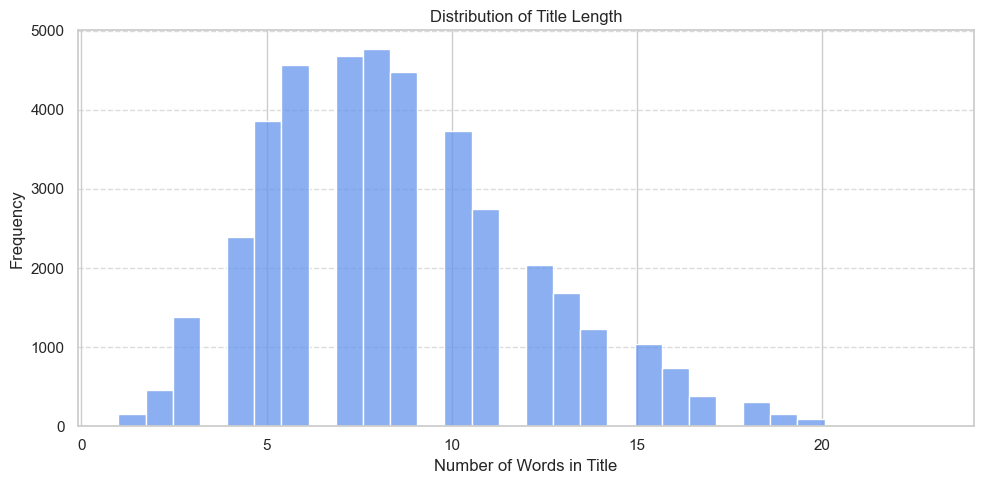

In [446]:
# Create a new column for title length (number of words)
df['title_length'] = df['title'].apply(lambda x: len(str(x).split()))

# Plot title length distribution
plt.figure(figsize=(10,5))
sns.histplot(df['title_length'], bins=30, color='#6495ED')
plt.title('Distribution of Title Length')
plt.xlabel('Number of Words in Title')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


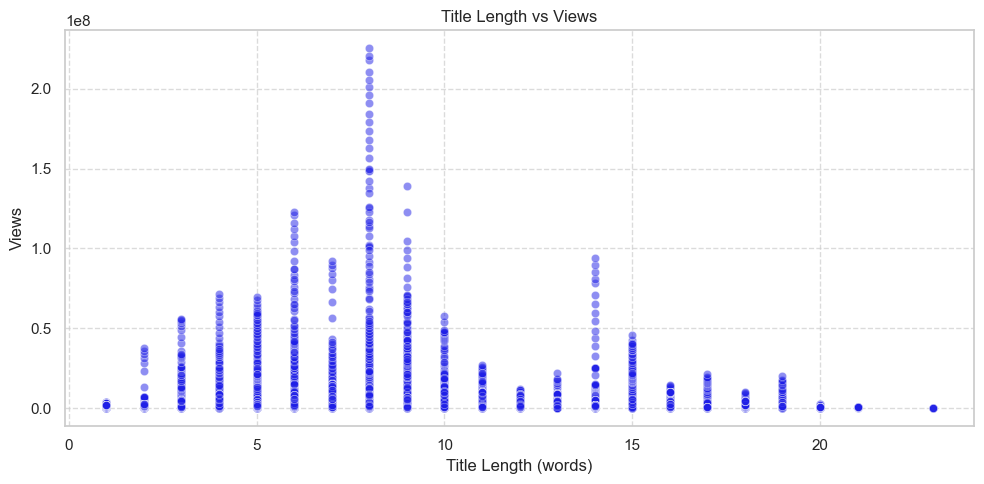

In [447]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='title_length', y='views', data=df, alpha=0.5, color='#1F1FE6')
plt.title('Title Length vs Views')
plt.xlabel('Title Length (words)')
plt.ylabel('Views')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Moderate relationship: medium-length titles (5–10 words) seem to perform better.
Overly long titles may hurt clarity and click rate.

---

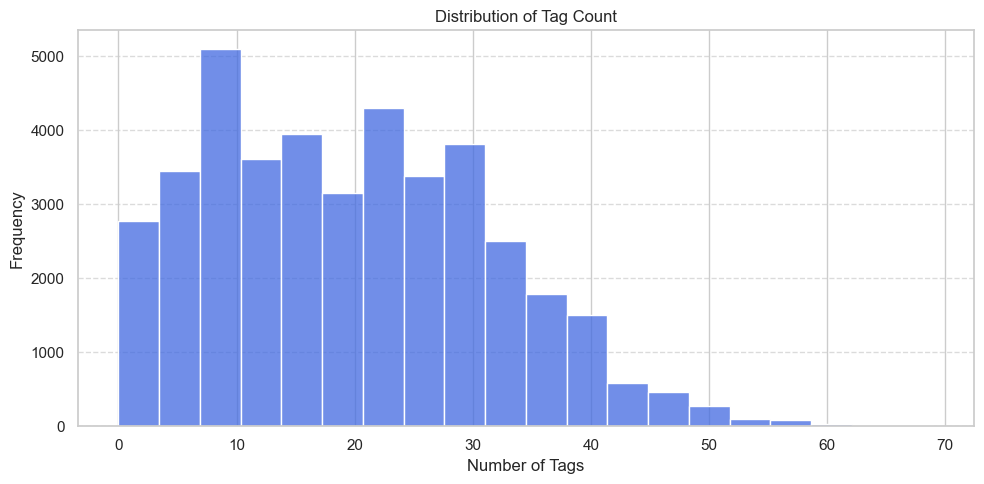

In [448]:
# Create a new column for number of tags
df['num_tags'] = df['tags'].apply(lambda x: 0 if x == '[none]' else len(str(x).split('|')))

# Plot tag count distribution
plt.figure(figsize=(10,5))
sns.histplot(df['num_tags'], bins=20, color='#4169E1')
plt.title('Distribution of Tag Count')
plt.xlabel('Number of Tags')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Final Insights from the Trending YouTube Videos Analysis


🎯 1. Content Category Strongly Influences Popularity

* Categories like **Entertainment** and **Music** received the highest average views, indicating their widespread appeal.
* Niche categories such as **News & Politics** and **Howto & Style** showed strong engagement despite having fewer videos — suggesting a more targeted, loyal audience.


⏰ 2. Publishing Time Matters

* Most videos were published between **3 PM and 8 PM**, aligning with high viewer activity.
* **Friday and Sunday** had the highest number of uploads and also performed well in terms of average views — ideal days for content release.


📝 3. Title & Tags Have Limited Influence

* **Title length** did not show a strong correlation with views — neither shorter nor longer titles had a consistent advantage.
* **Number of tags** alone didn’t significantly impact performance, but tagging may still help with discoverability and SEO.


💬 4. Sentiment Has a Mild Effect

* Videos with **positive titles** had slightly higher average views compared to neutral or negative titles.
* However, most titles were **neutral**, showing that creators tend to avoid emotional extremes in titles.


📈 5. Engagement Is Closely Tied to Success

* **Likes** and **engagement score** (likes + comments per view) had the strongest correlation with views.
* This highlights that views alone aren't the full story — interactive audiences are key to content impact.


🧠 6. Some Channels Dominate

* Channels like **ESPN** and **WWE** frequently appeared in top-performing videos, reflecting strong brand influence.
* Some smaller channels had **higher average engagement**, showing that quality over quantity still wins in the algorithm.


☁️ 7. Common Keywords Reflect Content Trends

* The WordCloud revealed frequent terms like **"trailer", "official", "new", "video"**, pointing to trending content types (e.g., music releases, game trailers, updates).

---

### Storytelling Summary

> *“This project analyzed tens of thousands of trending YouTube videos from the U.S. (2017–2018) to uncover what makes content go viral. From timing and title sentiment to category type and engagement ratios, we identified key patterns that successful creators follow. These insights can guide content strategies to boost reach, relevance, and retention.”*

---




### 👩‍💻 prepared by: Rawan Sotohy
YouTube Trending Data Analysis Project

NTI Summer Internship – 2025

---